In [200]:
import sklearn.metrics
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('summarized.csv')
df.head()

,Unnamed: 0,value,total_seconds,type,date
0,0,C#,108.293,languages,2020-10-01
1,1,Rider,108.293,editors,2020-10-01
2,2,HashSetDifference,108.293,projects,2020-10-01
3,3,Rust,2768.170,languages,2020-10-12
4,4,CMake,2054.230,languages,2020-10-12


In [4]:
df['date'] = pd.to_datetime(df['date'])

grouped = df[df.type == 'languages'].groupby(['date', 'value'])['total_seconds'].sum()
unstacked = grouped.unstack('value')
cumulative = unstacked.cumsum().ffill()
cumulative.head()

value,.env file,AUTO_DETECTED,Apache Config,Assembly,Assembly file,Bash,Batchfile,BibTeX,Blazor,C,...,VimL,XAML,XML,YAML,protobuf,reStructuredText,systemd,textmate,tmux,tsconfig
date,,,,,,,,,,,,,,,,,,,,,
2016-10-22,NaN,NaN,NaN,NaN,NaN,NaN,284.513934,NaN,NaN,238.115000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-23,NaN,NaN,NaN,NaN,NaN,NaN,1444.222925,NaN,NaN,245.714954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-24,NaN,NaN,NaN,NaN,NaN,1475.824889,1444.222925,NaN,NaN,245.714954,...,NaN,NaN,NaN,1926.958246,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-25,NaN,NaN,NaN,NaN,NaN,1475.824889,1444.222925,NaN,NaN,245.714954,...,21.207674,NaN,NaN,1926.958246,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-26,NaN,NaN,NaN,NaN,NaN,1478.723866,1444.222925,NaN,NaN,245.714954,...,21.207674,NaN,NaN,1926.958246,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cumulative.tail()

value,.env file,AUTO_DETECTED,Apache Config,Assembly,Assembly file,Bash,Batchfile,BibTeX,Blazor,C,...,VimL,XAML,XML,YAML,protobuf,reStructuredText,systemd,textmate,tmux,tsconfig
date,,,,,,,,,,,,,,,,,,,,,
2023-07-20,2270.926818,928.723,1.165864,327.99652,5.125,105609.334031,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,749008.855479,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-21,2270.926818,928.723,1.165864,327.99652,5.125,105728.459031,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,749022.657479,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-22,2270.926818,928.723,1.165864,327.99652,5.125,120608.542765,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,754813.854623,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-23,2270.926818,928.723,1.165864,327.99652,5.125,120608.542765,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,91832.252102,754813.854623,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722
2023-07-24,2270.926818,928.723,1.165864,327.99652,5.125,127274.431119,2587.47069,33196.583861,383.203,116127.877574,...,21.207674,2145.152,93069.816674,754814.539634,6721.688,6.110232,51.16846,5090.218344,108.024231,1169.722


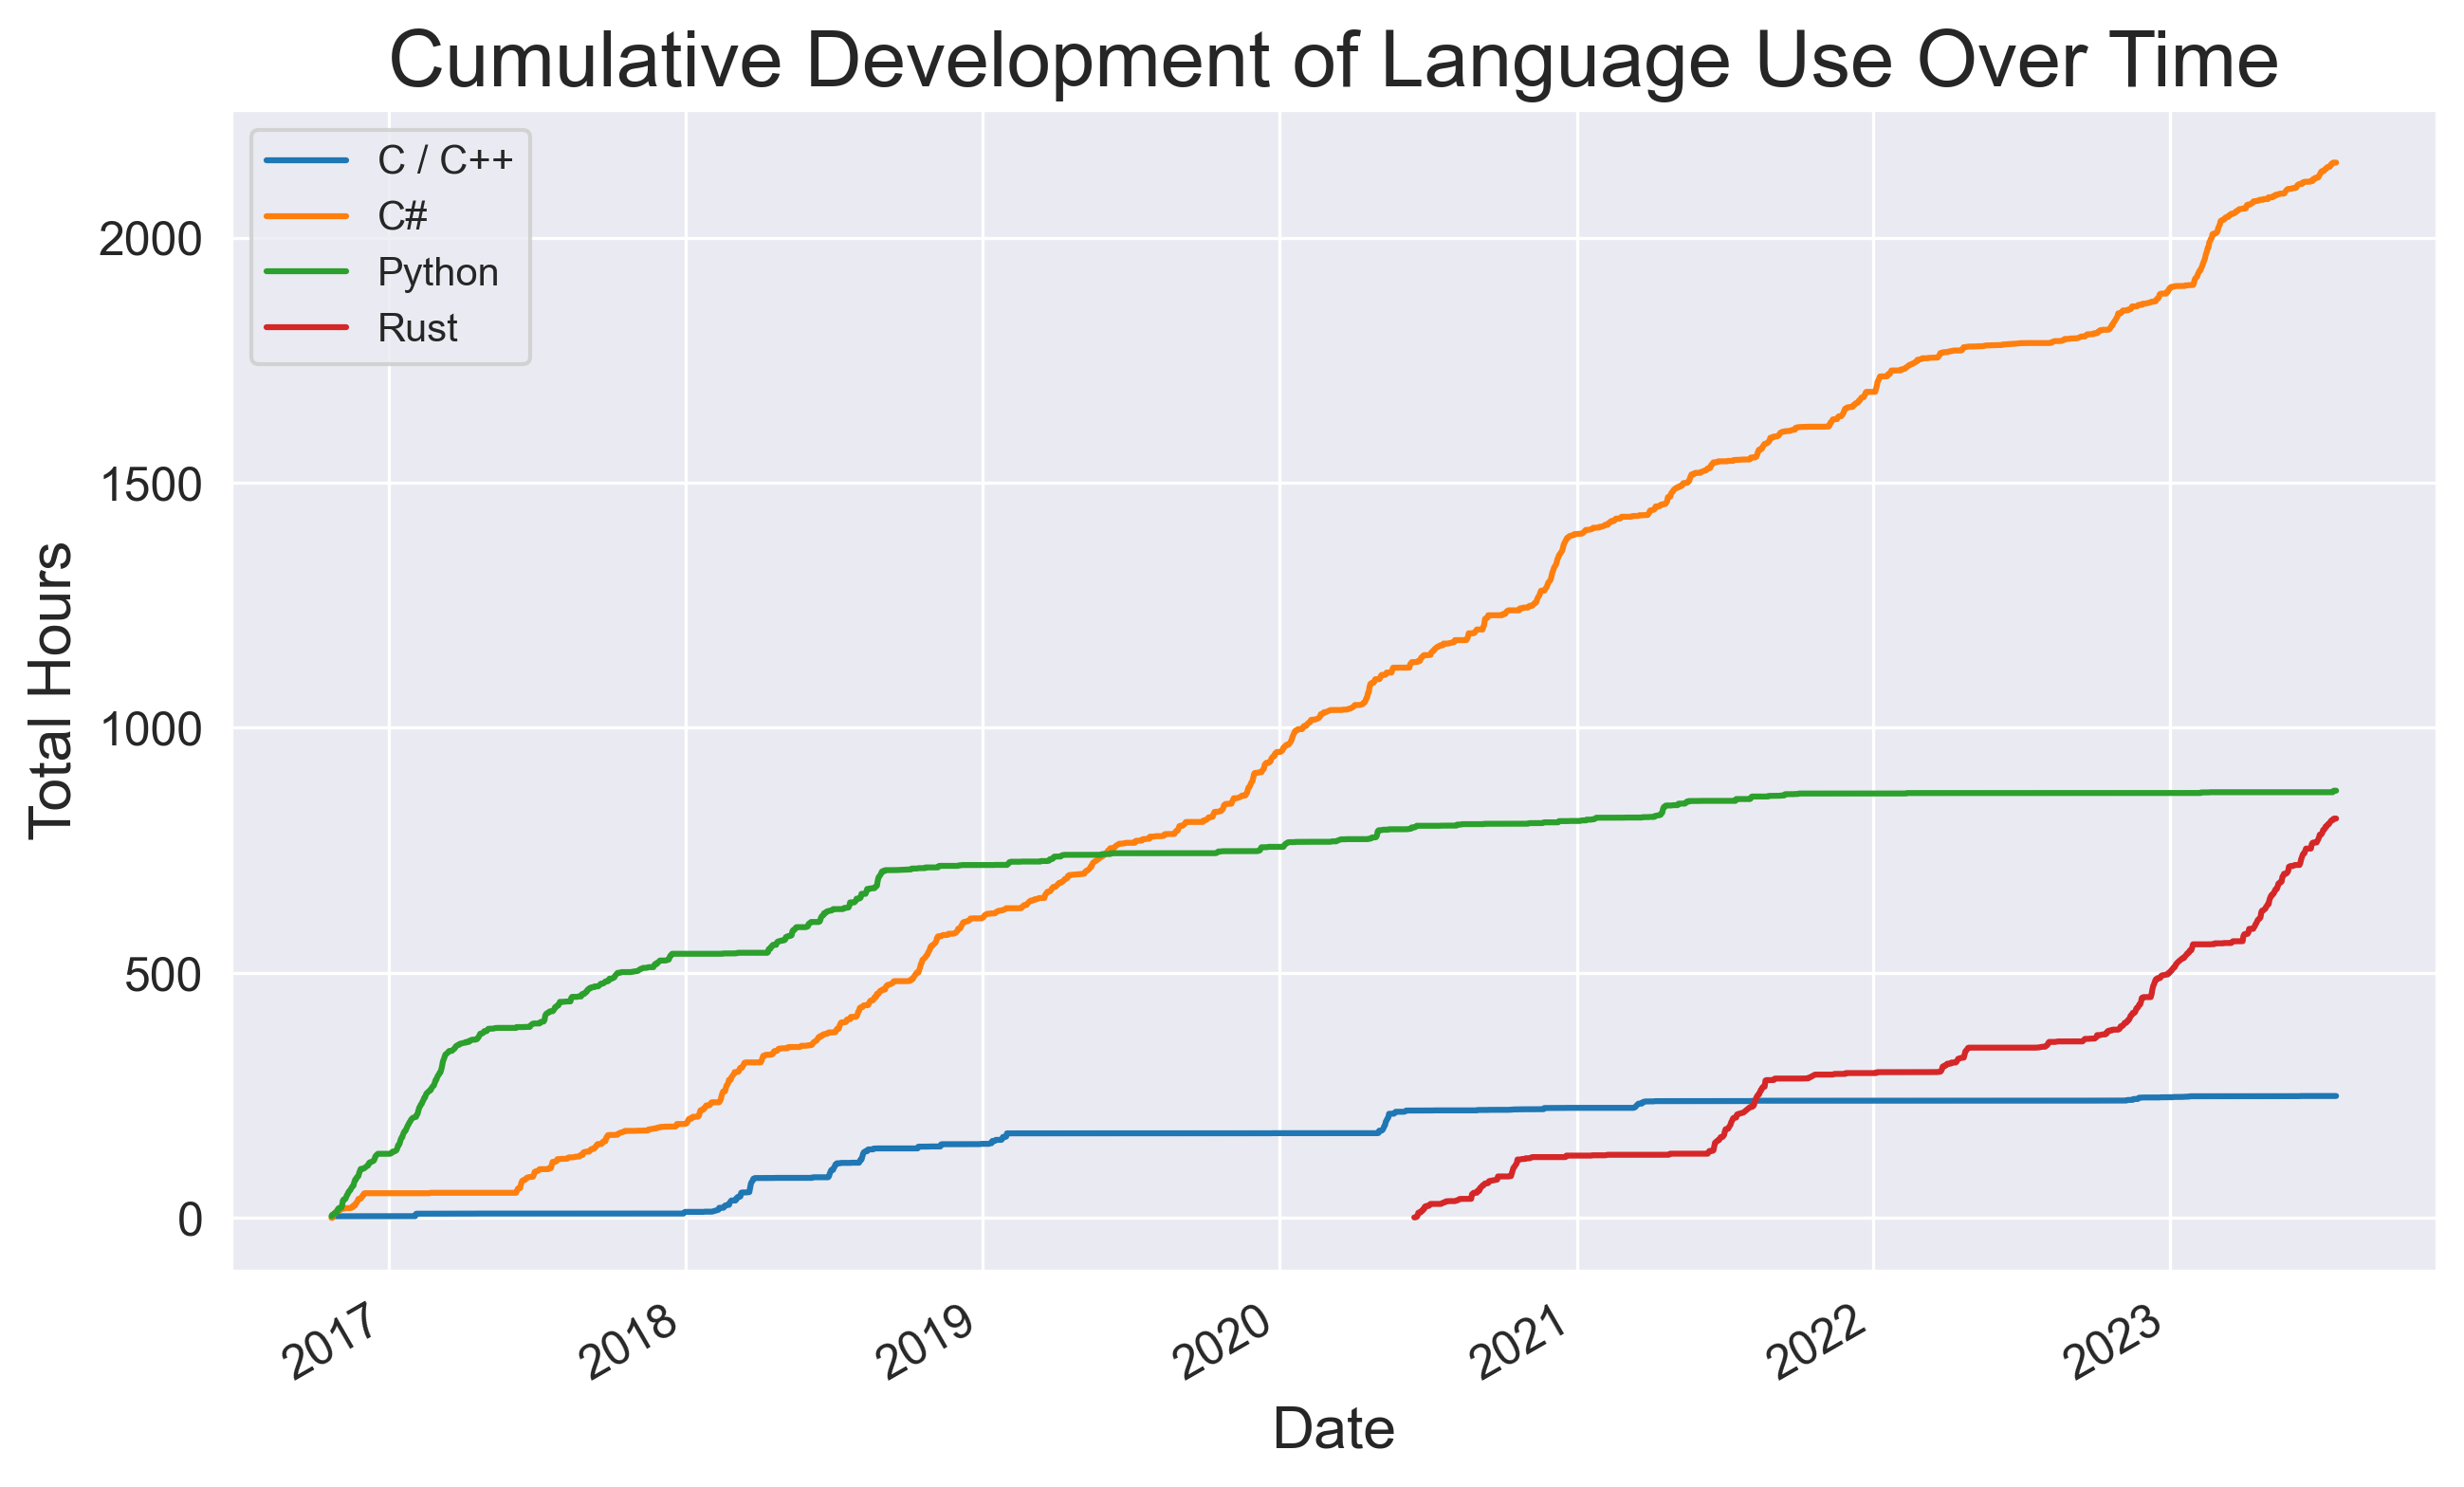

In [6]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Style elements
plt.grid(True)

# Filter columns with final cumulative sum that is high enough to be interesting
# interesting_cols = cumulative.columns[cumulative.iloc[-1] >= 0.5e6]
cumulative['C / C++'] = cumulative['C'] + cumulative['C++']
interesting_cols = ['C / C++', 'C#', 'Python', 'Rust']
filtered = cumulative[interesting_cols]
filtered = filtered / 3600
filtered.plot(kind = 'line', ax=ax)

# Set Title & Labels with increased font size
ax.set_title("Cumulative Development of Language Use Over Time", fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Total Hours', fontsize=15)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Enable legend
ax.legend()

# Display the plot
plt.show()

Summing up the last row gives the total amount of time.

In [12]:
cumulative = cumulative.drop(columns = ['C / C++'])

In [19]:
total_seconds = cumulative.iloc[-1].sum()
total_seconds

19247547.85799429

In [14]:
total_hours = total_seconds / 3600
total_hours

5346.54107166508

In [17]:
working_days = total_hours / 8
working_days

668.317633958135

In [20]:
working_years = working_days / 250
working_years

2.67327053583254

This boils down to 19 million seconds of coding, which is approximately 2.7 years of programming work, nonstop, assuming an 8 hours working day with 250 working days per year. 

In [33]:
observed_days = (cumulative.index.max() - cumulative.index.min()).days
observed_days

2466

In [36]:
observed_days / 365

6.756164383561644

In [183]:
Y = filtered['C#'].iloc[:].values.reshape(-1, 1)
X = (pd.Series(filtered.index.to_series().values).astype('int64').values/1000).reshape(-1, 1) # np.linspace(0, len(Y), len(Y)).reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [195]:
estimated = pd.concat([pd.Series(Y.reshape(-1)), pd.Series(Y_pred.reshape(-1))], axis=1, ignore_index=True).set_index(filtered['C#'].index)
estimated.rename(columns={0: 'Actual', 1: 'Predicted'}, inplace=True)
estimated['Delta'] = estimated['Actual'] - estimated['Predicted']
estimated.head()

,Actual,Predicted,Delta
date,,,
2016-10-22,0.057674,-122.880042,122.937716
2016-10-23,0.057674,-121.953445,122.011119
2016-10-24,5.055245,-121.026848,126.082093
2016-10-25,6.691221,-120.100251,126.791471
2016-10-26,10.396445,-119.173654,129.570099


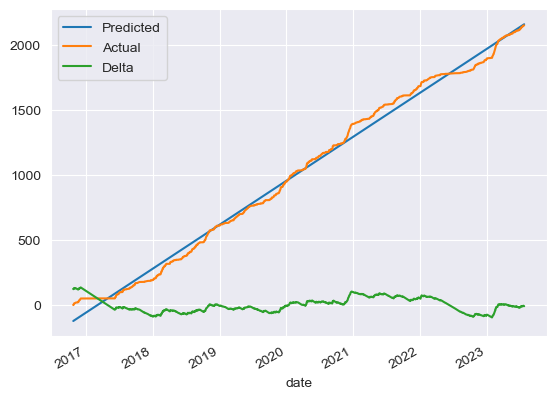

In [197]:
estimated[['Predicted', 'Actual', 'Delta']].plot();

In [201]:
r2_score(estimated['Actual'], estimated['Predicted'])

0.9935722575684695

The R² score for the prediction is about 0.99, indicating that 99% of the variability of the C# coding time can be explained by the linear model.

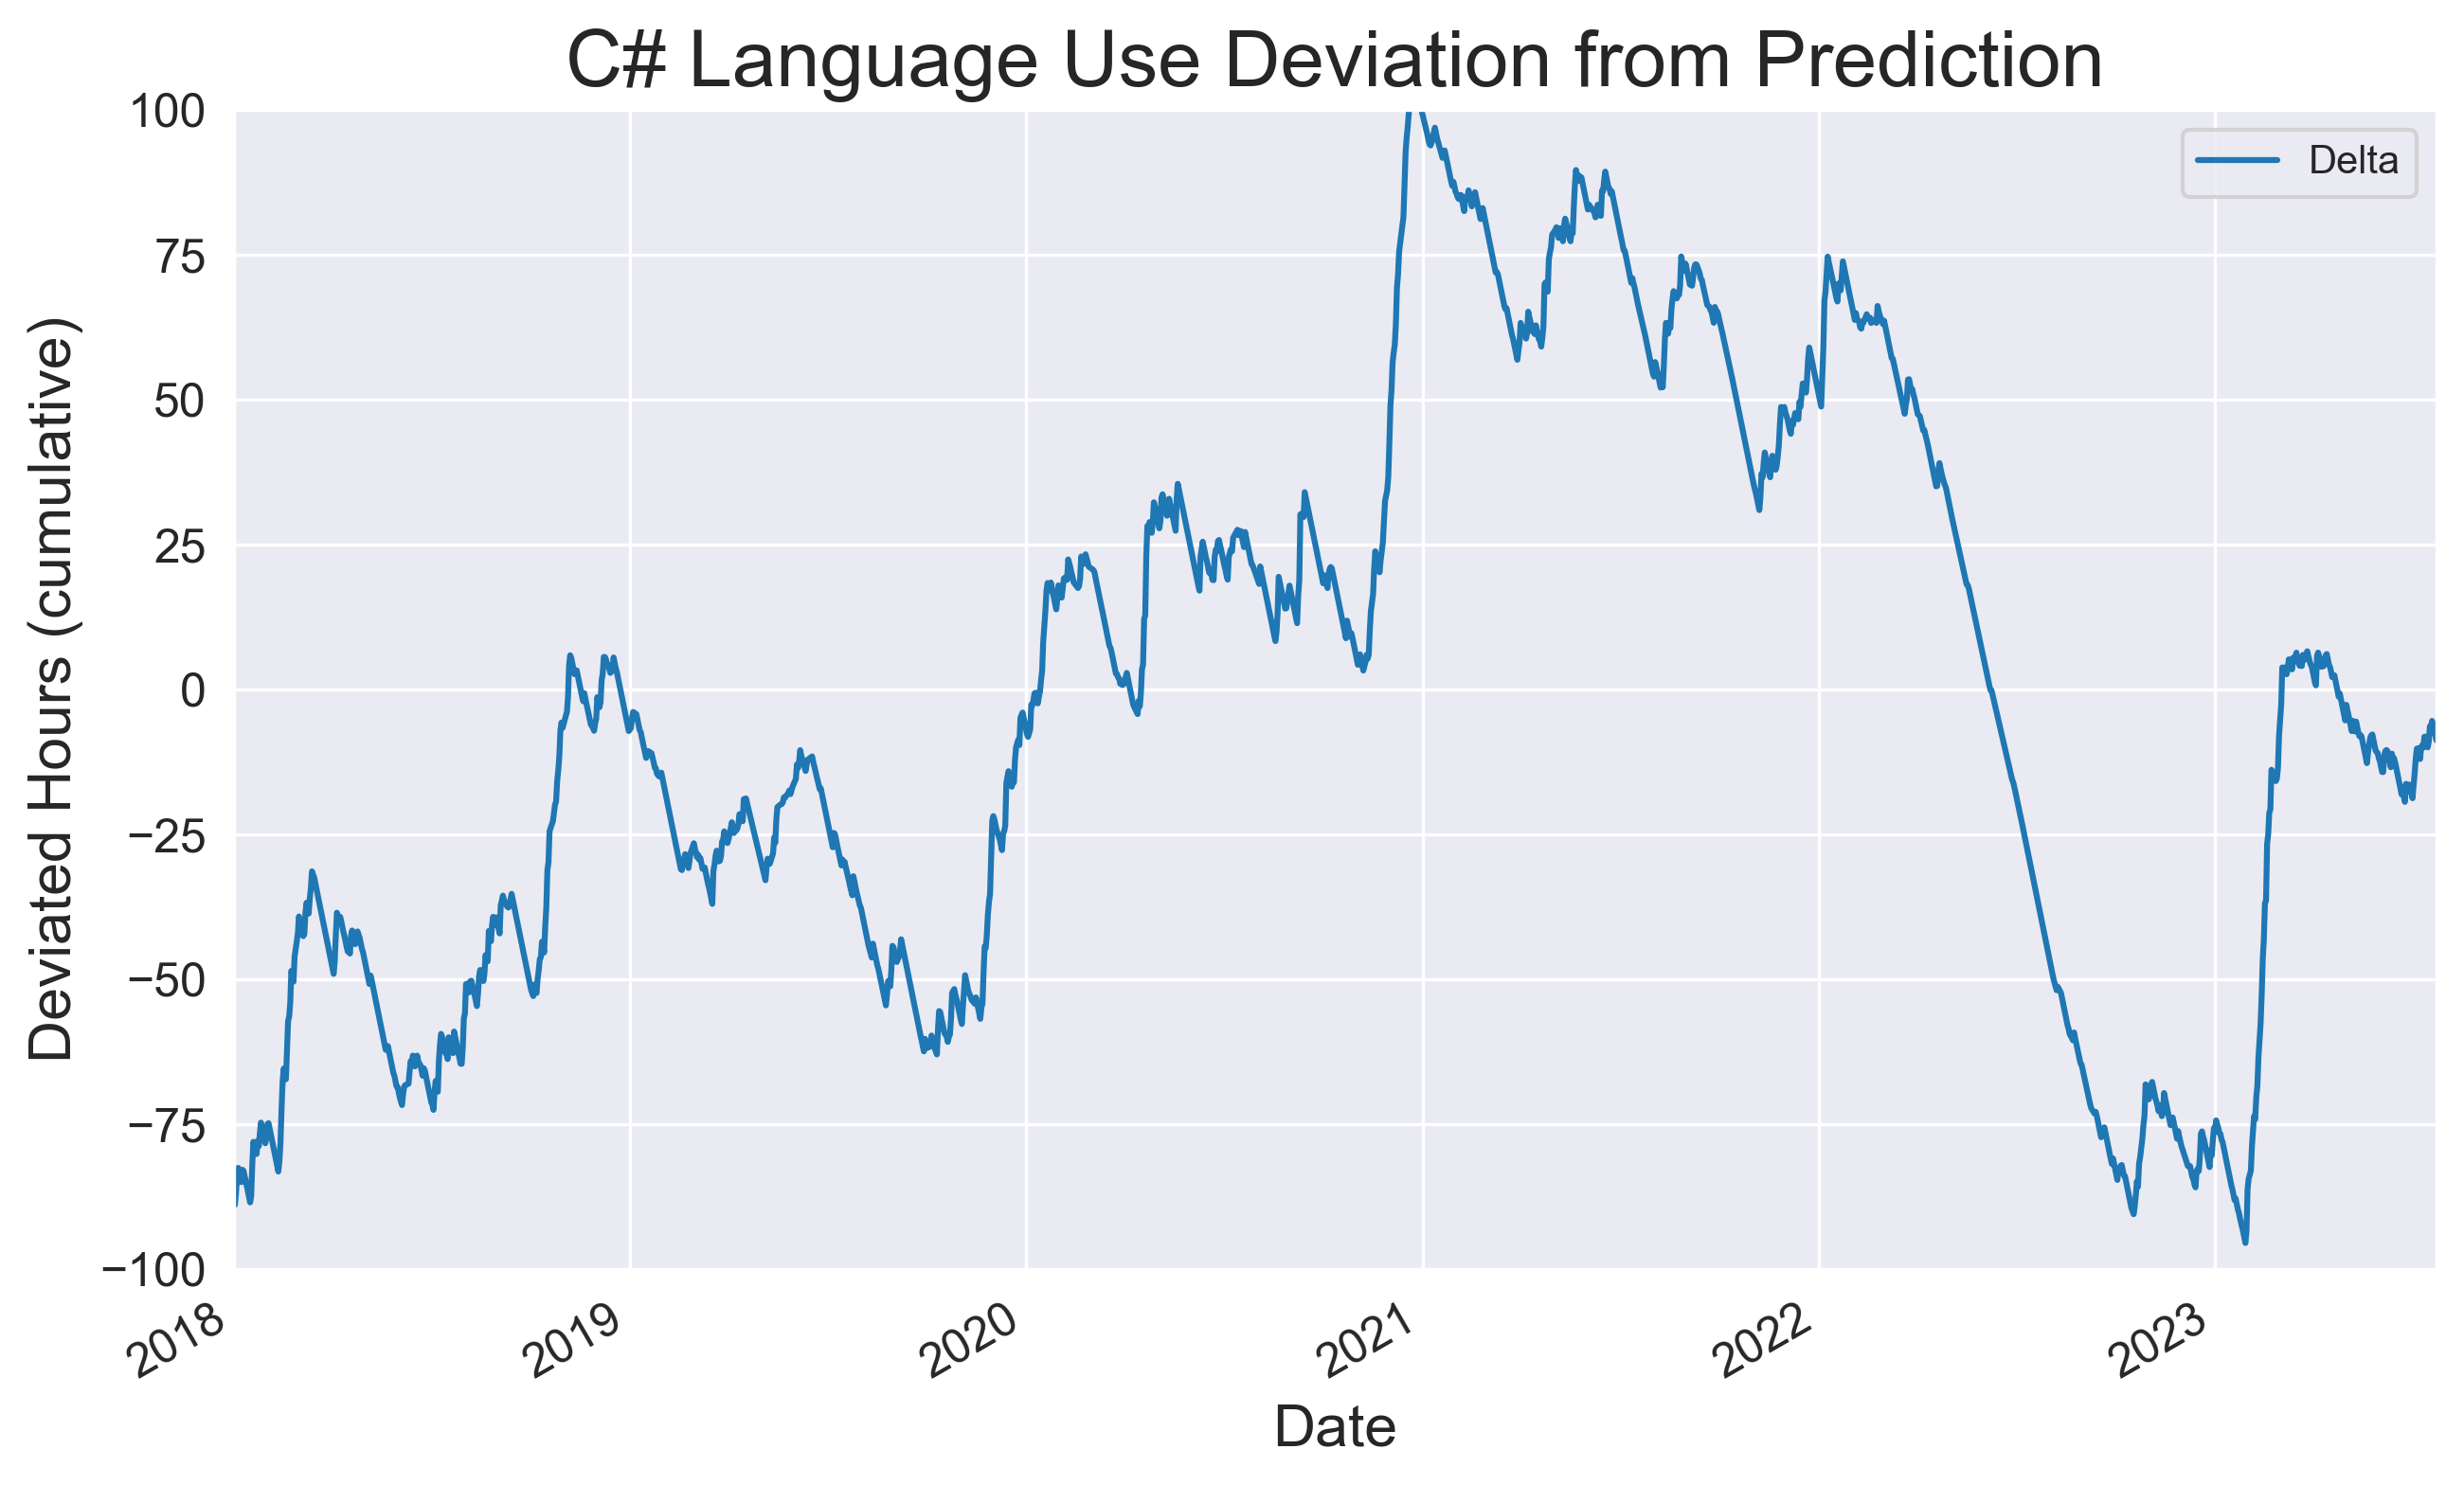

In [198]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

# Style elements
plt.grid(True)

estimated['Delta'].plot(kind = 'line', ax=ax)

# Set Title & Labels with increased font size
ax.set_title("C# Language Use Deviation from Prediction", fontsize=20)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Deviated Hours (cumulative)', fontsize=15)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Limit to valid range
plt.xlim(datetime.date(2018, 1, 1), datetime.date(2023, 7, 24))
plt.ylim([-100, 100])

# Enable legend
ax.legend()

# Display the plot
plt.show()

The switch to home office in 2020 resulted in more code being written (presumably due to less office space distractions). Not surprisingly, late 2022 was a period of strong burnout symptoms for me.

The seasonality in the pattern is worth a second look.